In [15]:
#import des bibliothèques

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Import de la base de données

import pandas as pd
df = pd.read_csv("FRAMINGANG.csv", sep= ";")
print(df.head())


   male   age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0   1.0  39.0        4.0            0.0         0.0     0.0              0.0   
1   0.0  46.0        2.0            0.0         0.0     0.0              0.0   
2   1.0  48.0        1.0            1.0        20.0     0.0              0.0   
3   0.0  61.0        3.0            1.0        30.0     0.0              0.0   
4   0.0  46.0        3.0            1.0        23.0     0.0              0.0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0           0.0       0.0    195.0  106.0   70.0  26.97       80.0     77.0   
1           0.0       0.0    250.0  121.0   81.0  28.73       95.0     76.0   
2           0.0       0.0    245.0  127.5   80.0  25.34       75.0     70.0   
3           1.0       0.0    225.0  150.0   95.0  28.58       65.0    103.0   
4           0.0       0.0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0         0.0  
1         0.

In [17]:
#structure data set
df.shape
df.info()
df.describe()       
df.dtypes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4239 entries, 0 to 4238
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   float64
 1   age              4238 non-null   float64
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   float64
dtypes: float64(16)
memory usage: 530.0 KB


male               float64
age                float64
education          float64
currentSmoker      float64
cigsPerDay         float64
BPMeds             float64
prevalentStroke    float64
prevalentHyp       float64
diabetes           float64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD         float64
dtype: object

In [18]:
###detection valeurs manquantes 
df.isna().mean().sort_values(ascending=False) * 100


glucose            9.176693
education          2.500590
BPMeds             1.273885
totChol            1.203114
cigsPerDay         0.707714
BMI                0.471809
heartRate          0.047181
male               0.023590
prevalentHyp       0.023590
prevalentStroke    0.023590
age                0.023590
currentSmoker      0.023590
diaBP              0.023590
sysBP              0.023590
diabetes           0.023590
TenYearCHD         0.023590
dtype: float64

In [ ]:
## Analyse croisée des variables avec glucose

df['glucose_missing'] = df['glucose'].isna().astype(int)

df['age_cat'] = pd.cut(df['age'], bins=[20,30,40,50,60,70,80], include_lowest=True)
df.groupby('age_cat')['glucose_missing'].mean()


C:\Users\YOGA Slim\AppData\Local\Temp\ipykernel_34784\2623977679.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_cat')['glucose_missing'].mean()


age_cat
(19.999, 30.0]         NaN
(30.0, 40.0]      0.093834
(40.0, 50.0]      0.094469
(50.0, 60.0]      0.094325
(60.0, 70.0]      0.074266
(70.0, 80.0]           NaN
Name: glucose_missing, dtype: float64

In [26]:
df.groupby('male')['glucose_missing'].mean()

male
0.0    0.112857
1.0    0.063222
Name: glucose_missing, dtype: float64

In [27]:
df.groupby('diabetes')['glucose_missing'].mean()


diabetes
0.0    0.093001
1.0    0.036697
Name: glucose_missing, dtype: float64

In [28]:
df.groupby('currentSmoker')['glucose_missing'].mean()

currentSmoker
0.0    0.085354
1.0    0.097899
Name: glucose_missing, dtype: float64

In [29]:
#Niveau d'education
df['education_missing'] = df['education'].isna().astype(int)

df.groupby('male')['education_missing'].mean()
df.groupby('age_cat')['education_missing'].mean()
df.groupby('currentSmoker')['education_missing'].mean()
df.groupby('diabetes')['education_missing'].mean()


C:\Users\YOGA Slim\AppData\Local\Temp\ipykernel_34784\3231606260.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_cat')['education_missing'].mean()


diabetes
0.0    0.024703
1.0    0.027523
Name: education_missing, dtype: float64

In [31]:
## BPmeds
df['bp_missing'] = df['BPMeds'].isna().astype(int)

print("Sexe :")
print(df.groupby('male')['bp_missing'].mean())

print("\nTabagisme :")
print(df.groupby('currentSmoker')['bp_missing'].mean())

print("\nDiabète :")
print(df.groupby('diabetes')['bp_missing'].mean())

print("\nÂge :")
print(df.groupby('age_cat')['bp_missing'].mean())


Sexe :
male
0.0    0.015709
1.0    0.008246
Name: bp_missing, dtype: float64

Tabagisme :
currentSmoker
0.0    0.013993
1.0    0.010984
Name: bp_missing, dtype: float64

Diabète :
diabetes
0.0    0.012352
1.0    0.018349
Name: bp_missing, dtype: float64

Âge :
age_cat
(19.999, 30.0]         NaN
(30.0, 40.0]      0.006702
(40.0, 50.0]      0.008080
(50.0, 60.0]      0.018405
(60.0, 70.0]      0.018998
(70.0, 80.0]           NaN
Name: bp_missing, dtype: float64


C:\Users\YOGA Slim\AppData\Local\Temp\ipykernel_34784\4164942461.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('age_cat')['bp_missing'].mean())


In [32]:
#Détection des outliers 
# methodes des IQR 
variables_a_tester = ['sysBP', 'diaBP', 'BMI', 'totChol', 'heartRate', 'glucose', 'cigsPerDay']

for col in variables_a_tester:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    nb_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    
    print(f"\n--- {col} ---")
    print(f"IQR: {IQR:.2f}")
    print(f"Outliers détectés : {nb_outliers}")
    print(f"Seuils : [{lower_bound:.2f}, {upper_bound:.2f}]")



--- sysBP ---
IQR: 27.00
Outliers détectés : 126
Seuils : [76.50, 184.50]

--- diaBP ---
IQR: 14.88
Outliers détectés : 81
Seuils : [52.69, 112.19]

--- BMI ---
IQR: 4.97
Outliers détectés : 97
Seuils : [15.62, 35.49]

--- totChol ---
IQR: 57.00
Outliers détectés : 56
Seuils : [120.50, 348.50]

--- heartRate ---
IQR: 15.00
Outliers détectés : 76
Seuils : [45.50, 105.50]

--- glucose ---
IQR: 16.00
Outliers détectés : 188
Seuils : [47.00, 111.00]

--- cigsPerDay ---
IQR: 20.00
Outliers détectés : 12
Seuils : [-30.00, 50.00]


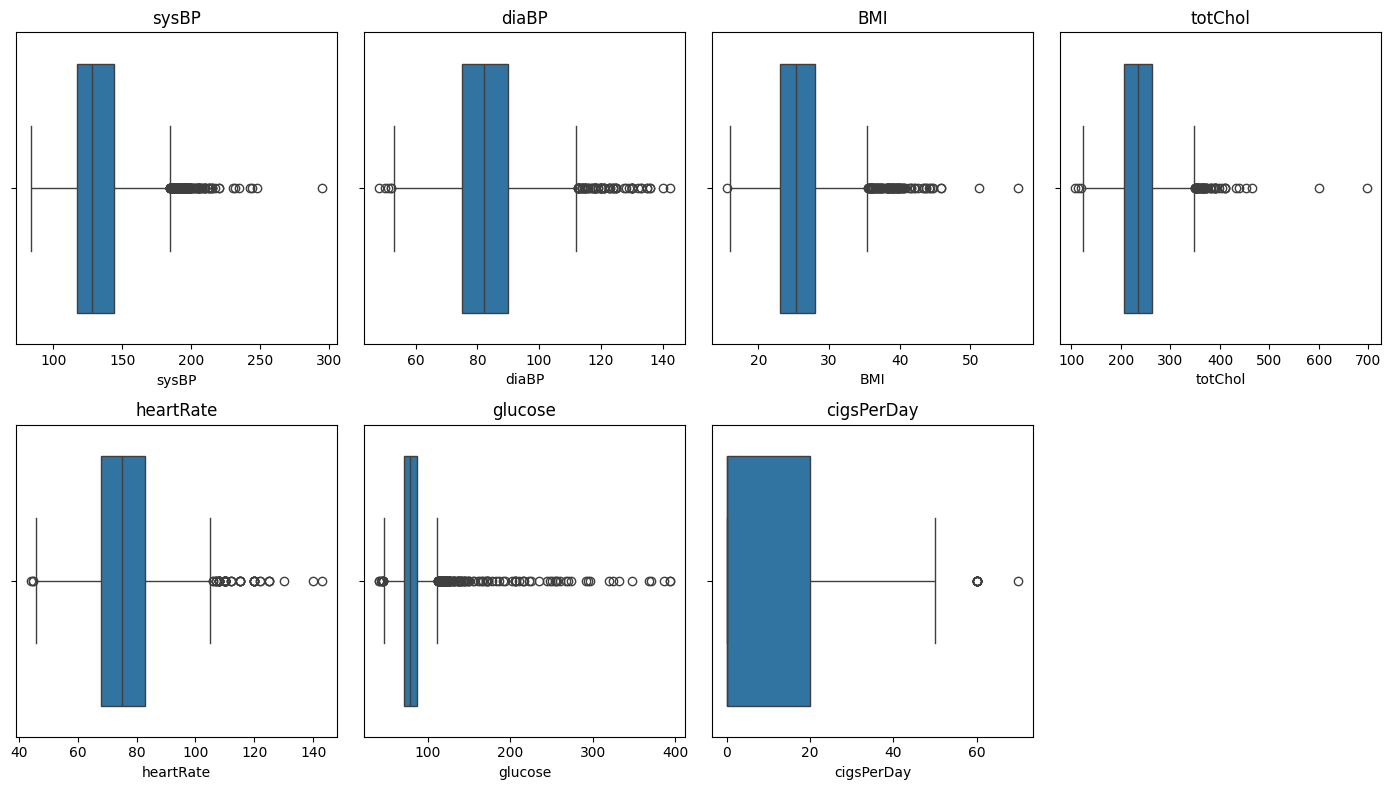

In [33]:
# Visualisation des outliers avec boxplots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
for i, col in enumerate(variables_a_tester, 1):
    plt.subplot(2,4,i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [34]:
# imputation des valeurs manquantes par la mediane et le mode
# Liste des variables numériques et catégorielles
numerical_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_vars = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke',
                    'prevalentHyp', 'diabetes', 'TenYearCHD']

# Imputation numérique : médiane
for col in numerical_vars:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Imputation catégorielle : mode
for col in categorical_vars:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

print("Imputation terminée !")
print(df.isna().sum())


Imputation terminée !
male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
glucose_missing      0
age_cat              1
education_missing    0
bp_missing           0
dtype: int64


C:\Users\YOGA Slim\AppData\Local\Temp\ipykernel_34784\258439604.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\YOGA Slim\AppData\Local\Temp\ipykernel_34784\258439604.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [37]:
#suppression de certaine variables unitiles 
cols_a_supprimer = ['age_cat', 'glucose_missing', 'education_missing', 'bp_missing']

df = df.drop(columns=cols_a_supprimer)

df.isna().sum(), df.columns


(male               0
 age                0
 education          0
 currentSmoker      0
 cigsPerDay         0
 BPMeds             0
 prevalentStroke    0
 prevalentHyp       0
 diabetes           0
 totChol            0
 sysBP              0
 diaBP              0
 BMI                0
 heartRate          0
 glucose            0
 TenYearCHD         0
 dtype: int64,
 Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
        'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
        'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
       dtype='object'))

In [38]:
# renommer les variables 
df = df.rename(columns={
    'male': 'sexe',
    'age': 'age',
    'education': 'niveau_education',
    'currentSmoker': 'fumeur_actuel',
    'cigsPerDay': 'cigarettes_par_jour',
    'BPMeds': 'traitement_hypertension',
    'prevalentStroke': 'antecedent_avc',
    'prevalentHyp': 'hypertension_preexistante',
    'diabetes': 'diabete',
    'totChol': 'cholesterol_total',
    'sysBP': 'pression_systolique',
    'diaBP': 'pression_diastolique',
    'BMI': 'imc',
    'heartRate': 'frequence_cardiaque',
    'glucose': 'glucose',
    'TenYearCHD': 'maladie_cardiaque_10ans'
})

df.columns


Index(['sexe', 'age', 'niveau_education', 'fumeur_actuel',
       'cigarettes_par_jour', 'traitement_hypertension', 'antecedent_avc',
       'hypertension_preexistante', 'diabete', 'cholesterol_total',
       'pression_systolique', 'pression_diastolique', 'imc',
       'frequence_cardiaque', 'glucose', 'maladie_cardiaque_10ans'],
      dtype='object')

In [ ]:
# Split train/test
from sklearn.model_selection import train_test_split

# Séparation variables explicatives / cible
X = df.drop(columns=['maladie_cardiaque_10ans'])
y = df['maladie_cardiaque_10ans'].astype(int)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)
print("Taille du jeu d'entraînement :", X_train.shape)
print("Taille du jeu de test :", X_test.shape) 
 


Taille du jeu d'entraînement : (3391, 15)
Taille du jeu de test : (848, 15)


In [41]:
#Vérification  stratification sur la cible
print("Taux classe 1 dans le train :", y_train.mean())
print("Taux classe 1 dans le test  :", y_test.mean())
print("Taux classe 1 global        :", y.mean())


Taux classe 1 dans le train : 0.15187260395163668
Taux classe 1 dans le test  : 0.15212264150943397
Taux classe 1 global        : 0.15192262326020287


In [ ]:
# création datasets finaux A1 = baseline A2 = scaling B1 = SMOTE B2 = SMOTE + scaling
X_train.head(), X_test.head(), y_train.head(), y_test.head()


(      sexe   age  niveau_education  fumeur_actuel  cigarettes_par_jour  \
 491    1.0  63.0               4.0            0.0                  0.0   
 3991   0.0  55.0               2.0            0.0                  0.0   
 495    1.0  44.0               1.0            1.0                 20.0   
 656    1.0  51.0               1.0            1.0                 20.0   
 629    0.0  52.0               2.0            1.0                 20.0   
 
       traitement_hypertension  antecedent_avc  hypertension_preexistante  \
 491                       0.0             0.0                        0.0   
 3991                      0.0             0.0                        0.0   
 495                       0.0             0.0                        0.0   
 656                       0.0             0.0                        0.0   
 629                       0.0             0.0                        0.0   
 
       diabete  cholesterol_total  pression_systolique  pression_diastolique  \
 491

In [45]:
# A1 : Données brutes (pas de scaling, pas de SMOTE)
X_train_A1 = X_train.copy()
y_train_A1 = y_train.copy()

print("A1 créé : brut (raw).")
print(X_train_A1.shape, y_train_A1.shape)


A1 créé : brut (raw).
(3391, 15) (3391,)


In [ ]:
# A2 : Scaling seul (StandardScaler)
from sklearn.preprocessing import StandardScaler

# Initialiser le scaler
scaler_A2 = StandardScaler()

# On fit sur X_train Puis on transform X_train et X_test

# Fit sur train, transform sur train
X_train_A2 = scaler_A2.fit_transform(X_train)

# Transform sur test (avec les mêmes paramètres)
X_test_scaled = scaler_A2.transform(X_test)

print("A2 créé : scaling effectué.")
print(X_train_A2.shape)


A2 créé : scaling effectué.
(3391, 15)


In [47]:
# B1 : SMOTE seul (pas de scaling)
from imblearn.over_sampling import SMOTE

# Initialiser SMOTE
smote = SMOTE(random_state=42)

# Appliquer uniquement sur le train
X_train_B1, y_train_B1 = smote.fit_resample(X_train, y_train)

print("B1 créé : SMOTE appliqué.")
print(X_train_B1.shape, y_train_B1.shape)


B1 créé : SMOTE appliqué.
(5752, 15) (5752,)


In [48]:
# B2 : SMOTE + Scaling
# Re-scaler pour B2
scaler_B2 = StandardScaler()

# SMOTE d'abord
X_train_B2_smote, y_train_B2_smote = smote.fit_resample(X_train, y_train)

# Puis scaling
X_train_B2 = scaler_B2.fit_transform(X_train_B2_smote)
X_test_B2_scaled = scaler_B2.transform(X_test)

print("B2 créé : SMOTE + Scaling.")
print(X_train_B2.shape, y_train_B2_smote.shape)


B2 créé : SMOTE + Scaling.
(5752, 15) (5752,)


In [49]:
# Export des datasets finaux

import pandas as pd
import os

# --- A1 : Données brutes (sans scaling, sans SMOTE) ---
pd.DataFrame(X_train_A1).to_csv("datasets/X_train_A1_raw.csv", index=False)
pd.DataFrame(y_train_A1).to_csv("datasets/y_train_A1_raw.csv", index=False)

# --- A2 : Scaling seul ---
pd.DataFrame(X_train_A2).to_csv("datasets/X_train_A2_scaled.csv", index=False)

# --- B1 : SMOTE seul ---
pd.DataFrame(X_train_B1).to_csv("datasets/X_train_B1_smote.csv", index=False)
pd.DataFrame(y_train_B1).to_csv("datasets/y_train_B1_smote.csv", index=False)

# --- B2 : SMOTE + Scaling ---
pd.DataFrame(X_train_B2).to_csv("datasets/X_train_B2_smote_scaled.csv", index=False)

# --- Jeux de test ---
pd.DataFrame(X_test).to_csv("datasets/X_test_raw.csv", index=False)
pd.DataFrame(X_test_scaled).to_csv("datasets/X_test_scaled.csv", index=False)
pd.DataFrame(y_test).to_csv("datasets/y_test.csv", index=False)

print("✔️ Exportation terminée ! Les 9 fichiers ont été sauvegardés dans le dossier 'datasets/'.")


✔️ Exportation terminée ! Les 9 fichiers ont été sauvegardés dans le dossier 'datasets/'.


In [50]:
df.dtypes


sexe                         float64
age                          float64
niveau_education             float64
fumeur_actuel                float64
cigarettes_par_jour          float64
traitement_hypertension      float64
antecedent_avc               float64
hypertension_preexistante    float64
diabete                      float64
cholesterol_total            float64
pression_systolique          float64
pression_diastolique         float64
imc                          float64
frequence_cardiaque          float64
glucose                      float64
maladie_cardiaque_10ans      float64
dtype: object

In [52]:
for col in df.columns:
    print(f"\n--- {col} ---")
    print(df[col].unique()[:20])  # premiers 10 uniques



--- sexe ---
[1. 0.]

--- age ---
[39. 46. 48. 61. 43. 63. 45. 52. 50. 41. 38. 42. 44. 47. 60. 35. 36. 59.
 54. 37.]

--- niveau_education ---
[4. 2. 1. 3.]

--- fumeur_actuel ---
[0. 1.]

--- cigarettes_par_jour ---
[ 0. 20. 30. 23. 15.  9. 10.  5. 35. 43.  1. 40.  3.  2. 12.  4. 18. 25.
 60. 14.]

--- traitement_hypertension ---
[0. 1.]

--- antecedent_avc ---
[0. 1.]

--- hypertension_preexistante ---
[0. 1.]

--- diabete ---
[0. 1.]

--- cholesterol_total ---
[195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332. 226.
 221. 232. 291. 190. 185. 234.]

--- pression_systolique ---
[106.  121.  127.5 150.  130.  180.  138.  100.  141.5 162.  133.  131.
 142.  124.  114.  140.  112.  122.  139.  108. ]

--- pression_diastolique ---
[ 70.   81.   80.   95.   84.  110.   71.   89.  107.   76.   88.   94.
  64.   90.   78.   84.5  70.5  77.5  82.   68. ]

--- imc ---
[26.97 28.73 25.34 28.58 23.1  30.3  33.11 21.68 26.36 23.61 22.91 27.64
 26.31 31.31 22.35 21.35 22.37 23.38 23